In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

def create_image_tile(image_files, rows, cols, gap_size=10):
    # 画像サイズを取得
    img = Image.open(image_files[0])
    img_width, img_height = img.size
    
    # 隙間を考慮してタイル全体の画像サイズを計算
    tile_width = img_width * cols + gap_size * (cols - 1)
    tile_height = img_height * rows + gap_size * (rows - 1)
    
    # タイル全体の画像を作成するための配列を作成
    tile_image = np.zeros((tile_height, tile_width, 3), dtype=np.uint8)
    
    # 画像をタイル状に並べる
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            if index < len(image_files):
                img_path = os.path.join(image_directory, image_files[index])
                img = Image.open(img_path)
                
                # 画像をタイル状に配置する位置を計算
                x_start = j * (img_width + gap_size)
                y_start = i * (img_height + gap_size)
                x_end = x_start + img_width
                y_end = y_start + img_height
                
                # 画像を配置
                tile_image[y_start:y_end, x_start:x_end, :] = img
                
    return tile_image


(4260, 3402, 3)


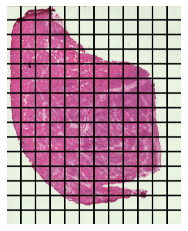

True

In [39]:
from glob import glob
from natsort import natsorted

SIZE = 256

# タイルの行数と列数を指定
rows = 15
cols = 12

# 画像が格納されているディレクトリを指定
image_directory = ""

# 画像ファイルのリストを取得

image_files = natsorted(glob("./TEST_raw256/day3/image/*.png"))

# 隙間のサイズを指定
gap_size = 30

# 画像をタイル状に並べ、隙間を挿入して表示
tile_image = create_image_tile(image_files, rows, cols, gap_size)
print(tile_image.shape)

# 画像を表示
plt.imshow(tile_image)
plt.axis('off')
plt.show()

import cv2
cv2.imwrite("merge.png", tile_image[:, :, ::-1])